In [26]:
from utils import get_data, load_model , dictionry_to_class
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [4]:
#Define the configurations as a dictionary (*for further research, it is preferable to move it into a separate file out of the code).

configs_dict = dict(train_data_path = "data/train_home_assignment_.csv",
                   target_col = "org_price_usd_following_30_days",
                   columns_to_drop = ["treatment", "org_price_usd_following_30_days_after_impact"],
                   models_directory = "models",
                   model_name = "xbg_regressor_model_task1",
                   time_format = "%Y_%m_%d-%H_%M_%S",
                   model_file_type = "json",
                   model_path = "models/xbg_regressor_model_2023_04_14-09_00_07.json",
                   treatment_col_name = "treatment",
                   new_treatment_col_name = "optimal_treatment",
                   data_directory = "data",
                   test_size = 0.2,
                   treatment_values = [2,10])

# Convert dictionary into class 
configs = dictionry_to_class(configs_dict)

In [6]:
# Load data, remove unnecessary columns, split to train test 
X_train, X_test, y_train, y_test = get_data(path = configs.train_data_path, 
                                            target_col = configs.target_col, 
                                            test_size = configs.test_size,
                                            columns_to_drop = configs.columns_to_drop)

In [9]:
xgb_regressor_gs_cv_pipline = load_model(model_path = configs.model_path)
model = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.regressor

In [28]:
X_train_transformed = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.preprocessor.transform(X_train)
X_test_transformed = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.preprocessor.transform(X_test)

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
X, y = load_diabetes(return_X_y=True)
reg = XGBRegressor(
                 learning_rate =model.learning_rate ,
                     max_depth =model.max_depth ,
                     min_child_weight =model.min_child_weight ,
                     subsample =model.subsample ,
                     colsample_bytree =model.colsample_bytree ,
                     n_estimators =model.n_estimators ,
                     objective='reg:squaredlogerror', 
    eval_metric='rmse',
)
reg.fit(X_train_transformed, y_train, eval_set=[(X_train_transformed, y_train),(X_test_transformed, y_test)])

[0]	validation_0-rmse:165.27048	validation_1-rmse:164.50026
[1]	validation_0-rmse:165.24012	validation_1-rmse:164.47069
[2]	validation_0-rmse:165.20770	validation_1-rmse:164.43913
[3]	validation_0-rmse:165.17312	validation_1-rmse:164.40549
[4]	validation_0-rmse:165.13623	validation_1-rmse:164.36962
[5]	validation_0-rmse:165.09691	validation_1-rmse:164.33140
[6]	validation_0-rmse:165.05499	validation_1-rmse:164.29066
[7]	validation_0-rmse:165.01033	validation_1-rmse:164.24731
[8]	validation_0-rmse:164.96278	validation_1-rmse:164.20116
[9]	validation_0-rmse:164.91221	validation_1-rmse:164.15210
[10]	validation_0-rmse:164.85848	validation_1-rmse:164.10000
[11]	validation_0-rmse:164.80150	validation_1-rmse:164.04477
[12]	validation_0-rmse:164.74109	validation_1-rmse:163.98624
[13]	validation_0-rmse:164.67701	validation_1-rmse:163.92420
[14]	validation_0-rmse:164.60910	validation_1-rmse:163.85846
[15]	validation_0-rmse:164.53721	validation_1-rmse:163.78888
[16]	validation_0-rmse:164.46111	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squaredlogerror', predictor=None, ...)

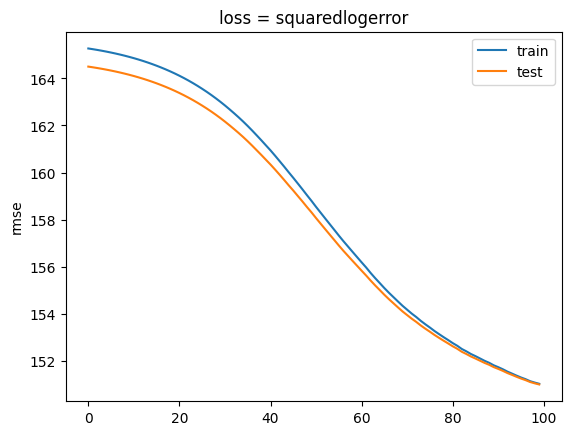

In [39]:
results = reg.evals_result()

# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
plt.ylabel("rmse")
plt.title("loss = squaredlogerror")
# show the plot
plt.savefig("gif/loss_convergence_squaredlogerror_eval_rmse.png")
plt.show()